# <span style="color:#61b5ff;">**🍯Honey Purity and Price Prediction**</span>


___Project Domain : Food Science___

----------------------------------------------------------------------------------------------------------------

___Project Goal:___
- _Honey is a natural sweet substance produced by honeybees primarily from the nectar of flowers. It has been consumed by humans for thousands of years and is valued not only for its sweetness but also for its potential health benefits and diverse culinary uses._
- _The purity and authenticity of honey have become significant concerns due to the prevalence of adulteration and fraudulent practices in the honey industry. Adulterated honey, which may contain added sugars, syrups, or other substances, not only compromises consumer trust but also poses potential health risks._
- _The aim of this project is to build a predictive model to predict **'Purity'** of the honey with the help of available resources.In addtion to this the **'price'** of the honey also predicted._
- _It is a **regression problem**,so the best regression model is trained to predict the possible outcomes._
- _The dataset is taken from [Kaggle](https://www.kaggle.com/datasets/stealthtechnologies/predict-purity-and-price-of-honey) which has enough amount of sample data to build a predictive model._

![](https://img.freepik.com/free-photo/honey-dripping-from-dipper-into-jar-set-against-wooden-tones_157027-4421.jpg?w=1380&t=st=1709986012~exp=1709986612~hmac=83e83d5a308da8f4ea61e82353a28eac7ddd36c84dc8bd0f61451c0c3f8358be)

_Image Credits : [Freepik](https://www.freepik.com/)_

#### ___Load dataset:___

In [1]:
#Import neceassry libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("honey_purity_dataset.csv")
pd.set_option("display.max_columns",None)
print("Shape of the dataset :",df.shape)
df.head(3)

Shape of the dataset : (247903, 11)


,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64


___Column Description :___

- CS (Color Score):
Represents the color score of the honey sample, ranging from 1.0 to 10.0. Lower values indicate a lighter color, while higher values indicate a darker color.

- Density:
Represents the density of the honey sample in grams per cubic centimeter at 25°C, ranging from 1.21 to 1.86.

- WC (Water Content):
Represents the water content in the honey sample, ranging from 12.0% to 25.0%.

- pH:
Represents the pH level of the honey sample, ranging from 2.50 to 7.50.

- EC (Electrical Conductivity):
Represents the electrical conductivity of the honey sample in milliSiemens per centimeter.

- F (Fructose Level):
Represents the fructose level of the honey sample, ranging from 20 to 50.

- G (Glucose Level):
Represents the glucose level of the honey sample, ranging from 20 to 45.

- Pollen_analysis:
Represents the floral source of the honey sample. Possible values include Clover, Wildflower, Orange Blossom, Alfalfa, Acacia, Lavender, Eucalyptus, Buckwheat, Manuka, Sage, Sunflower, Borage, Rosemary, Thyme, Heather, Tupelo, Blueberry, Chestnut, and Avocado.

- Viscosity:
Represents the viscosity of the honey sample in centipoise, ranging from 1500 to 10000. Viscosity values between 2500 and 9500 are considered optimal for purity.

- Purity:
The target variable represents the purity of the honey sample, ranging from 0.01 to 1.00.

- Price:
The calculated price of the honey.

In [3]:
#Checking for duplicates
print(df.duplicated().sum())
#----------------------------------
print(df.isnull().sum().to_dict())

0
{'CS': 0, 'Density': 0, 'WC': 0, 'pH': 0, 'EC': 0, 'F': 0, 'G': 0, 'Pollen_analysis': 0, 'Viscosity': 0, 'Purity': 0, 'Price': 0}


## ___Explorartory Data Analysis (EDA)___

In [4]:
#Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns


********************************************************************************************************************
- **Feature Variables :**
'CS', 'Density', 'WC', 'pH', 'EC', 'F', 'G', 'Pollen_analysis','Viscosity'

- **Target Variables :**
 'Purity', 'Price'
********************************************************************************************************************

In [5]:
#Renaming the column names
df.rename(columns=
{'CS': "Color Score", 'WC': "Water Content",  'EC': "Electrical Conductivity", 'F':"Fructose Level", 'G': "Glucose Level", "Pollen_analysis":'Pollen Analysis',},inplace=True)

___Data Information :___

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Color Score              247903 non-null  float64
 1   Density                  247903 non-null  float64
 2   Water Content            247903 non-null  float64
 3   pH                       247903 non-null  float64
 4   Electrical Conductivity  247903 non-null  float64
 5   Fructose Level           247903 non-null  float64
 6   Glucose Level            247903 non-null  float64
 7   Pollen Analysis          247903 non-null  object 
 8   Viscosity                247903 non-null  float64
 9   Purity                   247903 non-null  float64
 10  Price                    247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB


___Data Statistics :___

In [7]:
df.describe()

,Color Score,Density,Water Content,pH,Electrical Conductivity,Fructose Level,Glucose Level,Viscosity,Purity,Price
count,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000
mean,5.500259,1.535523,18.502625,4.996047,0.799974,34.970573,32.501006,5752.893888,0.824471,594.807644
std,2.593947,0.187824,3.748635,1.444060,0.057911,8.655898,7.226290,2455.739903,0.139417,233.627972
min,1.000000,1.210000,12.000000,2.500000,0.700000,20.000000,20.000000,1500.050000,0.610000,128.720000
25%,3.260000,1.370000,15.260000,3.750000,0.750000,27.460000,26.230000,3627.880000,0.660000,433.000000
50%,5.500000,1.540000,18.510000,4.990000,0.800000,34.970000,32.490000,5753.770000,0.820000,612.960000
75%,7.740000,1.700000,21.750000,6.250000,0.850000,42.470000,38.760000,7886.650000,0.970000,770.220000
max,10.000000,1.860000,25.000000,7.500000,0.900000,50.000000,45.000000,9999.970000,1.000000,976.690000


In [8]:
print(df.columns.to_list())

['Color Score', 'Density', 'Water Content', 'pH', 'Electrical Conductivity', 'Fructose Level', 'Glucose Level', 'Pollen Analysis', 'Viscosity', 'Purity', 'Price']


_Numerical and Categorial Variables :_

In [9]:
numerical_variables=['Color Score', 'Density', 'Water Content', 'pH', 'Electrical Conductivity', 'Fructose Level', 'Glucose Level', 'Viscosity', 'Purity', 'Price']
categorical_variables=["Pollen Analysis"]

___Analysing Categorical variables :___

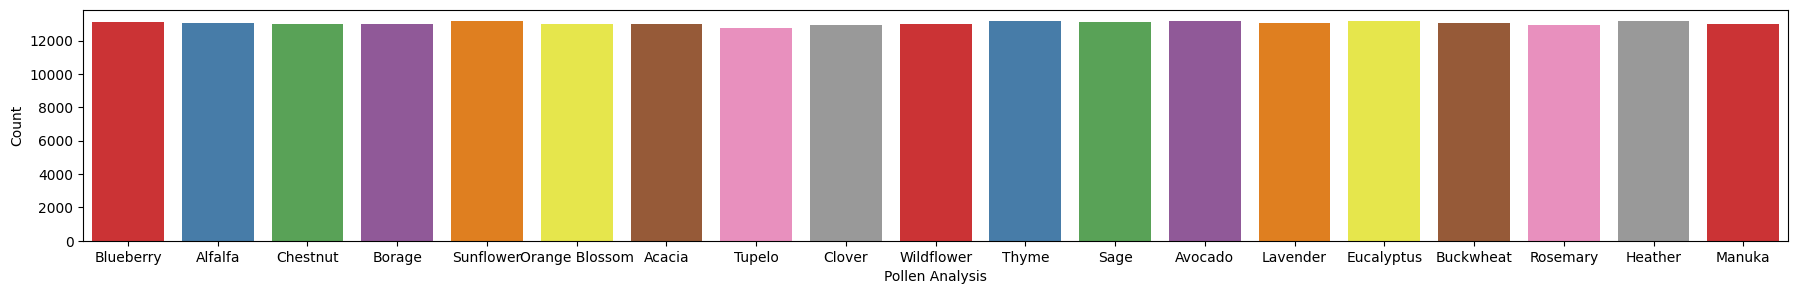

In [10]:
#Count of categories in each variable
plt.figure(figsize=(22, 3))
sns.countplot(x=df["Pollen Analysis"],palette='Set1')
plt.ylabel('Count')
plt.xlabel("Pollen Analysis")
plt.show()

In [11]:
pollen_analysis=df["Pollen Analysis"].value_counts().to_dict()

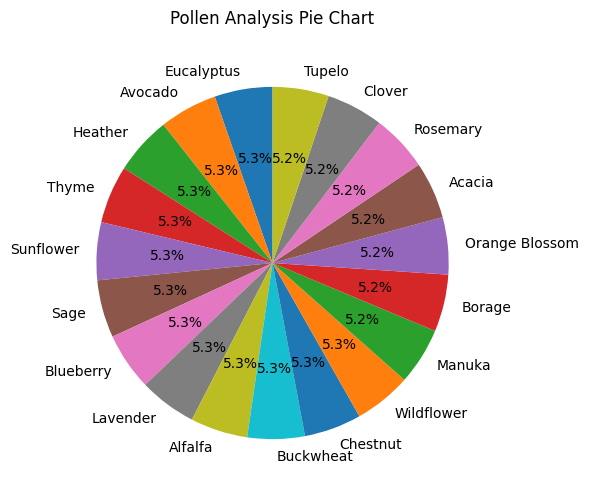

In [12]:
#Pie chart
pollen_analysis=df["Pollen Analysis"].value_counts().to_dict()
plt.figure(figsize=(5, 6))
plt.pie(pollen_analysis.values(), labels=pollen_analysis.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Pollen Analysis Pie Chart')
plt.axis('equal')
plt.show()

___Observation :___
- _By seeing the pie chart all the floral source of honey are almost eqaully contributed in this dataset.Each source category contributes on a average of **5.25%** and it is a good sign._

___Data Distribution of Numerical Variables :___

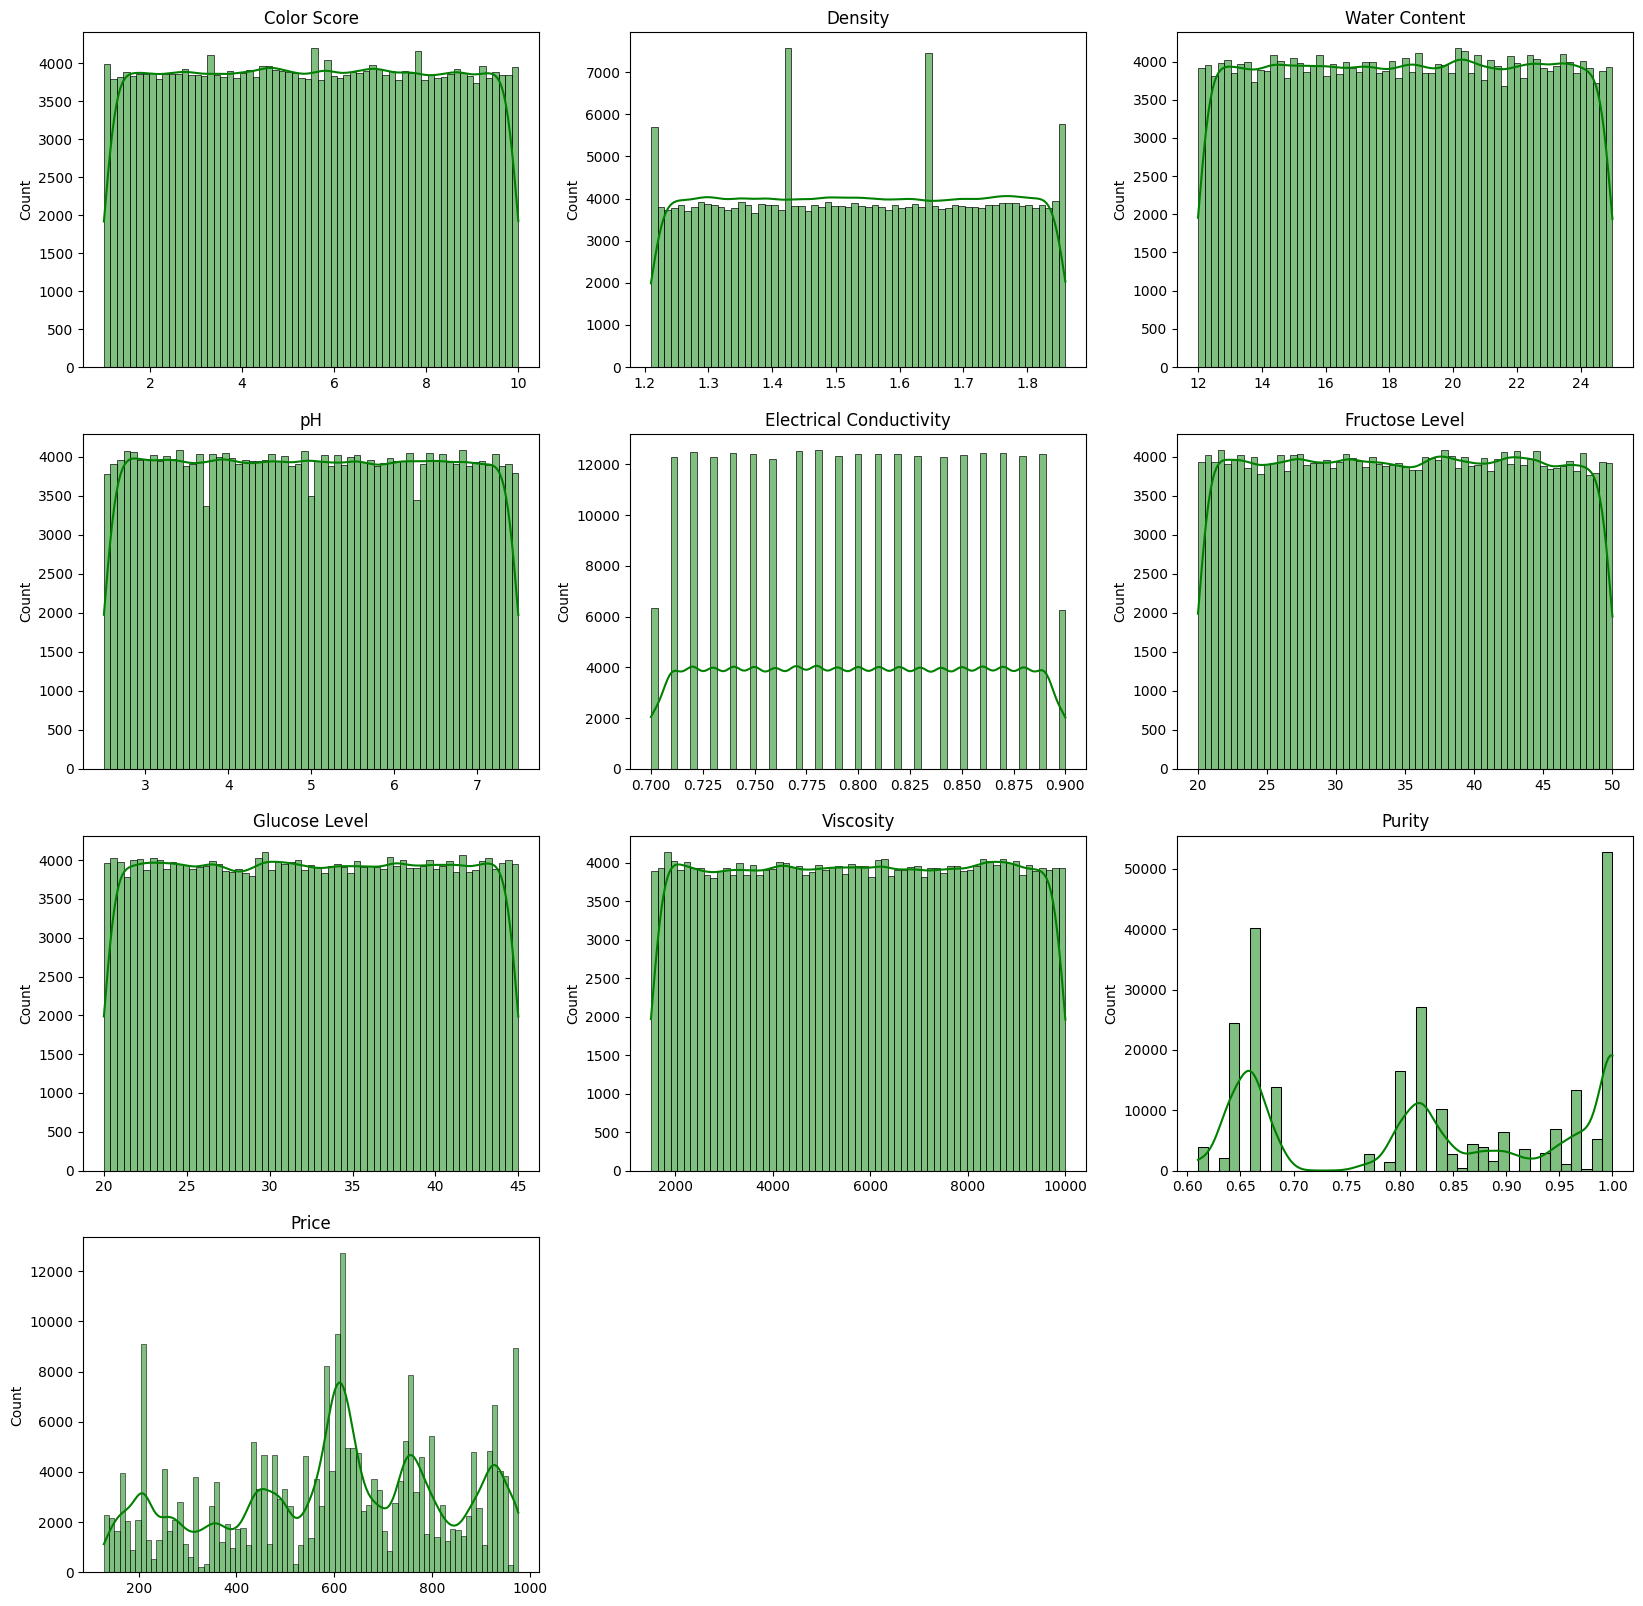

In [13]:
#Histogram
plt.figure(figsize=(20, 20))
ind=1
for  variable in (numerical_variables):
    plt.subplot(4,3, ind)
    sns.histplot(x=df[variable],kde=True,color="green")
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.show()

___Checking for Outliers :___

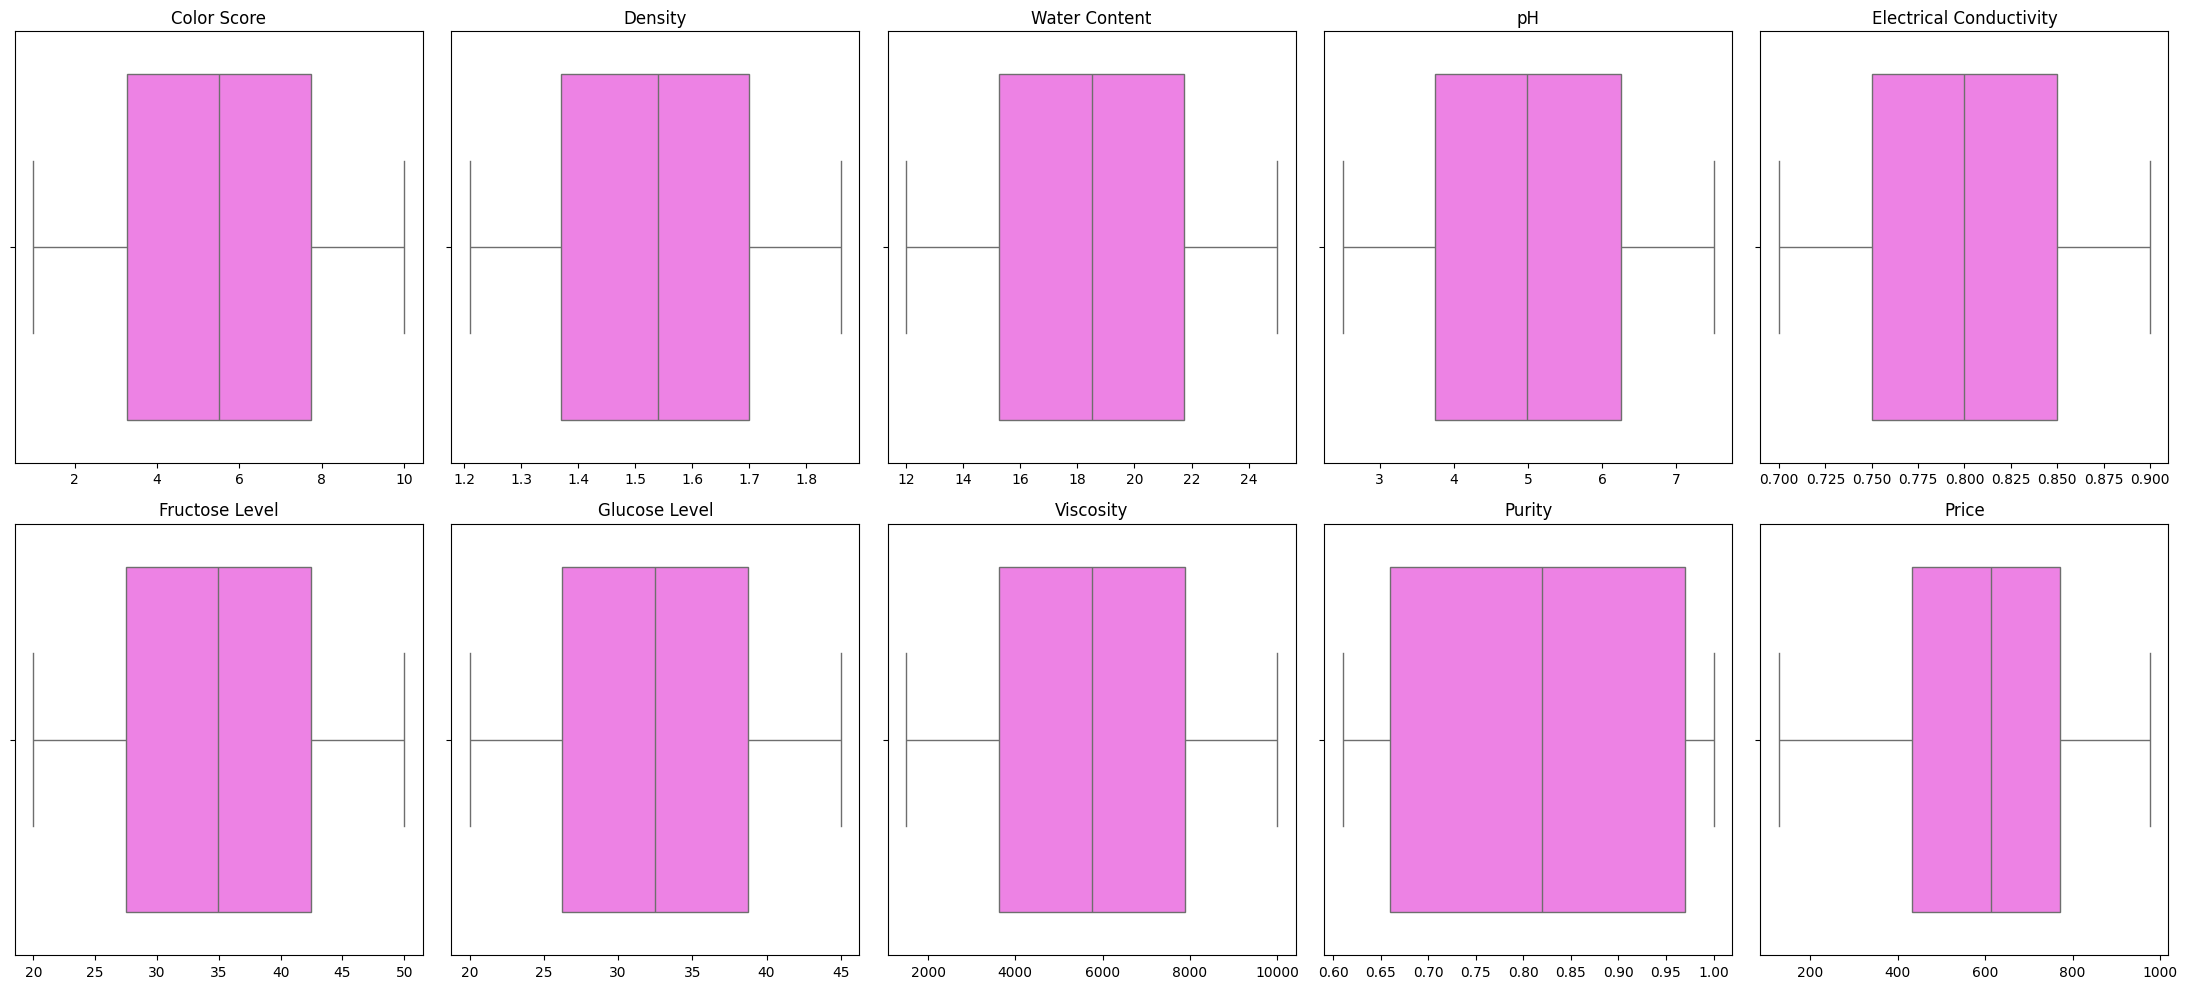

In [14]:
plt.figure(figsize=(22, 10))
ind=1
for  variable in (numerical_variables):
    plt.subplot(2,5, ind)
    sns.boxplot(x=df[variable],color="#ff70f3")
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.tight_layout()
plt.show()

___Inference :___
 - _**No noticable 'Data Skewness' or 'Outliers'** is seen in the variables._

***Feature Variables vs Target :***

_Purity vs other Numerical Variables :_

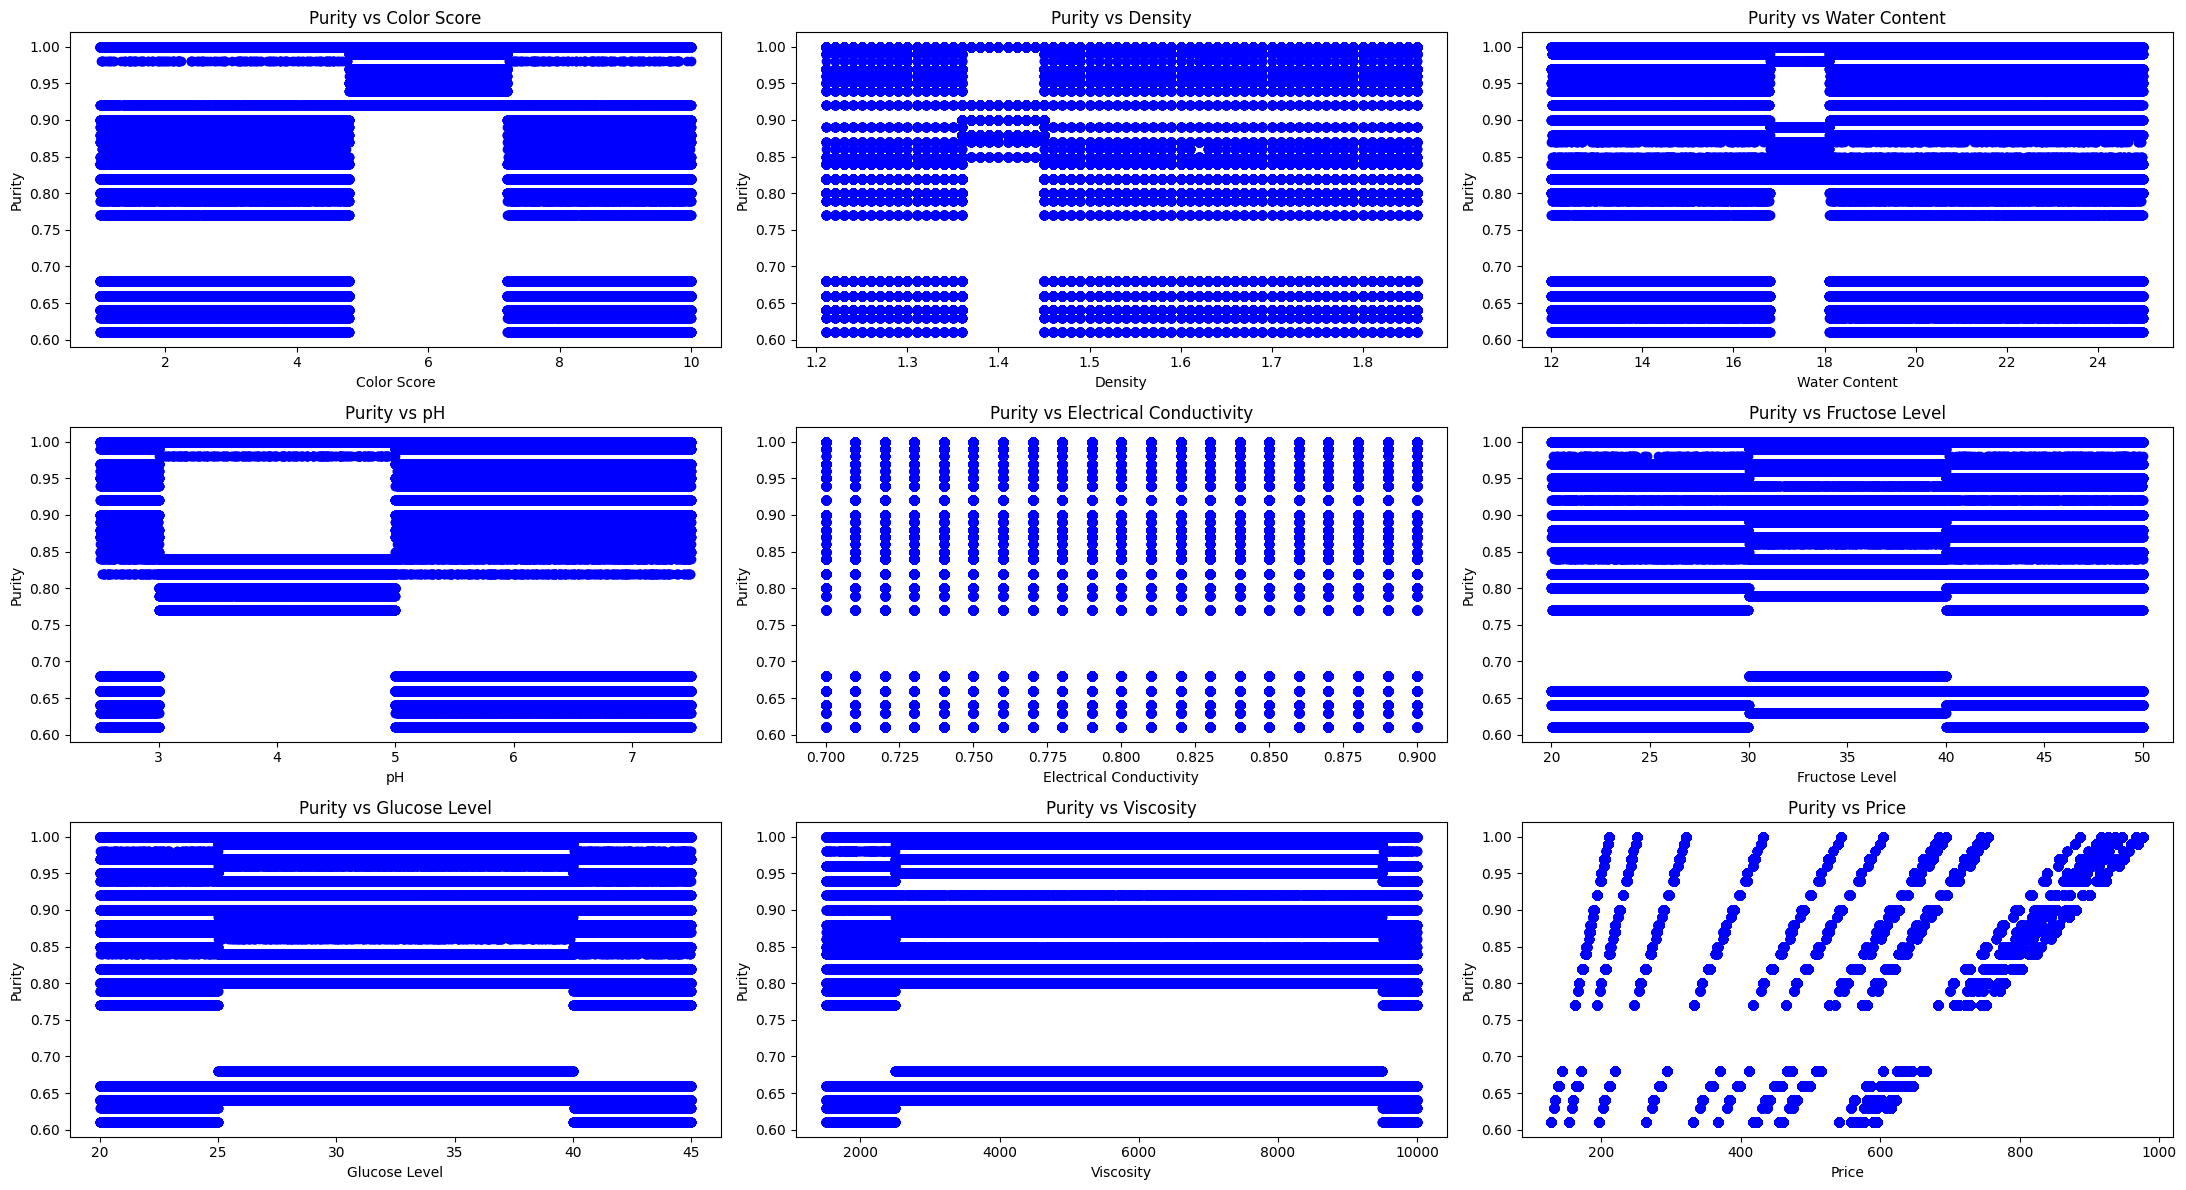

In [15]:
#Scatter plot
plt.figure(figsize=(22, 12))
ind=1
for  variable in (['Color Score', 'Density', 'Water Content', 'pH', 'Electrical Conductivity', 'Fructose Level', 'Glucose Level', 'Viscosity','Price']):
    plt.subplot(3,3, ind)
    plt.scatter(df[variable],df["Purity"],color="blue")
    plt.title(f"Purity vs {variable}")
    ind+=1
    plt.xlabel(variable)
    plt.ylabel("Purity")
plt.tight_layout()
plt.show()

_Price vs other Numerical Variables:_

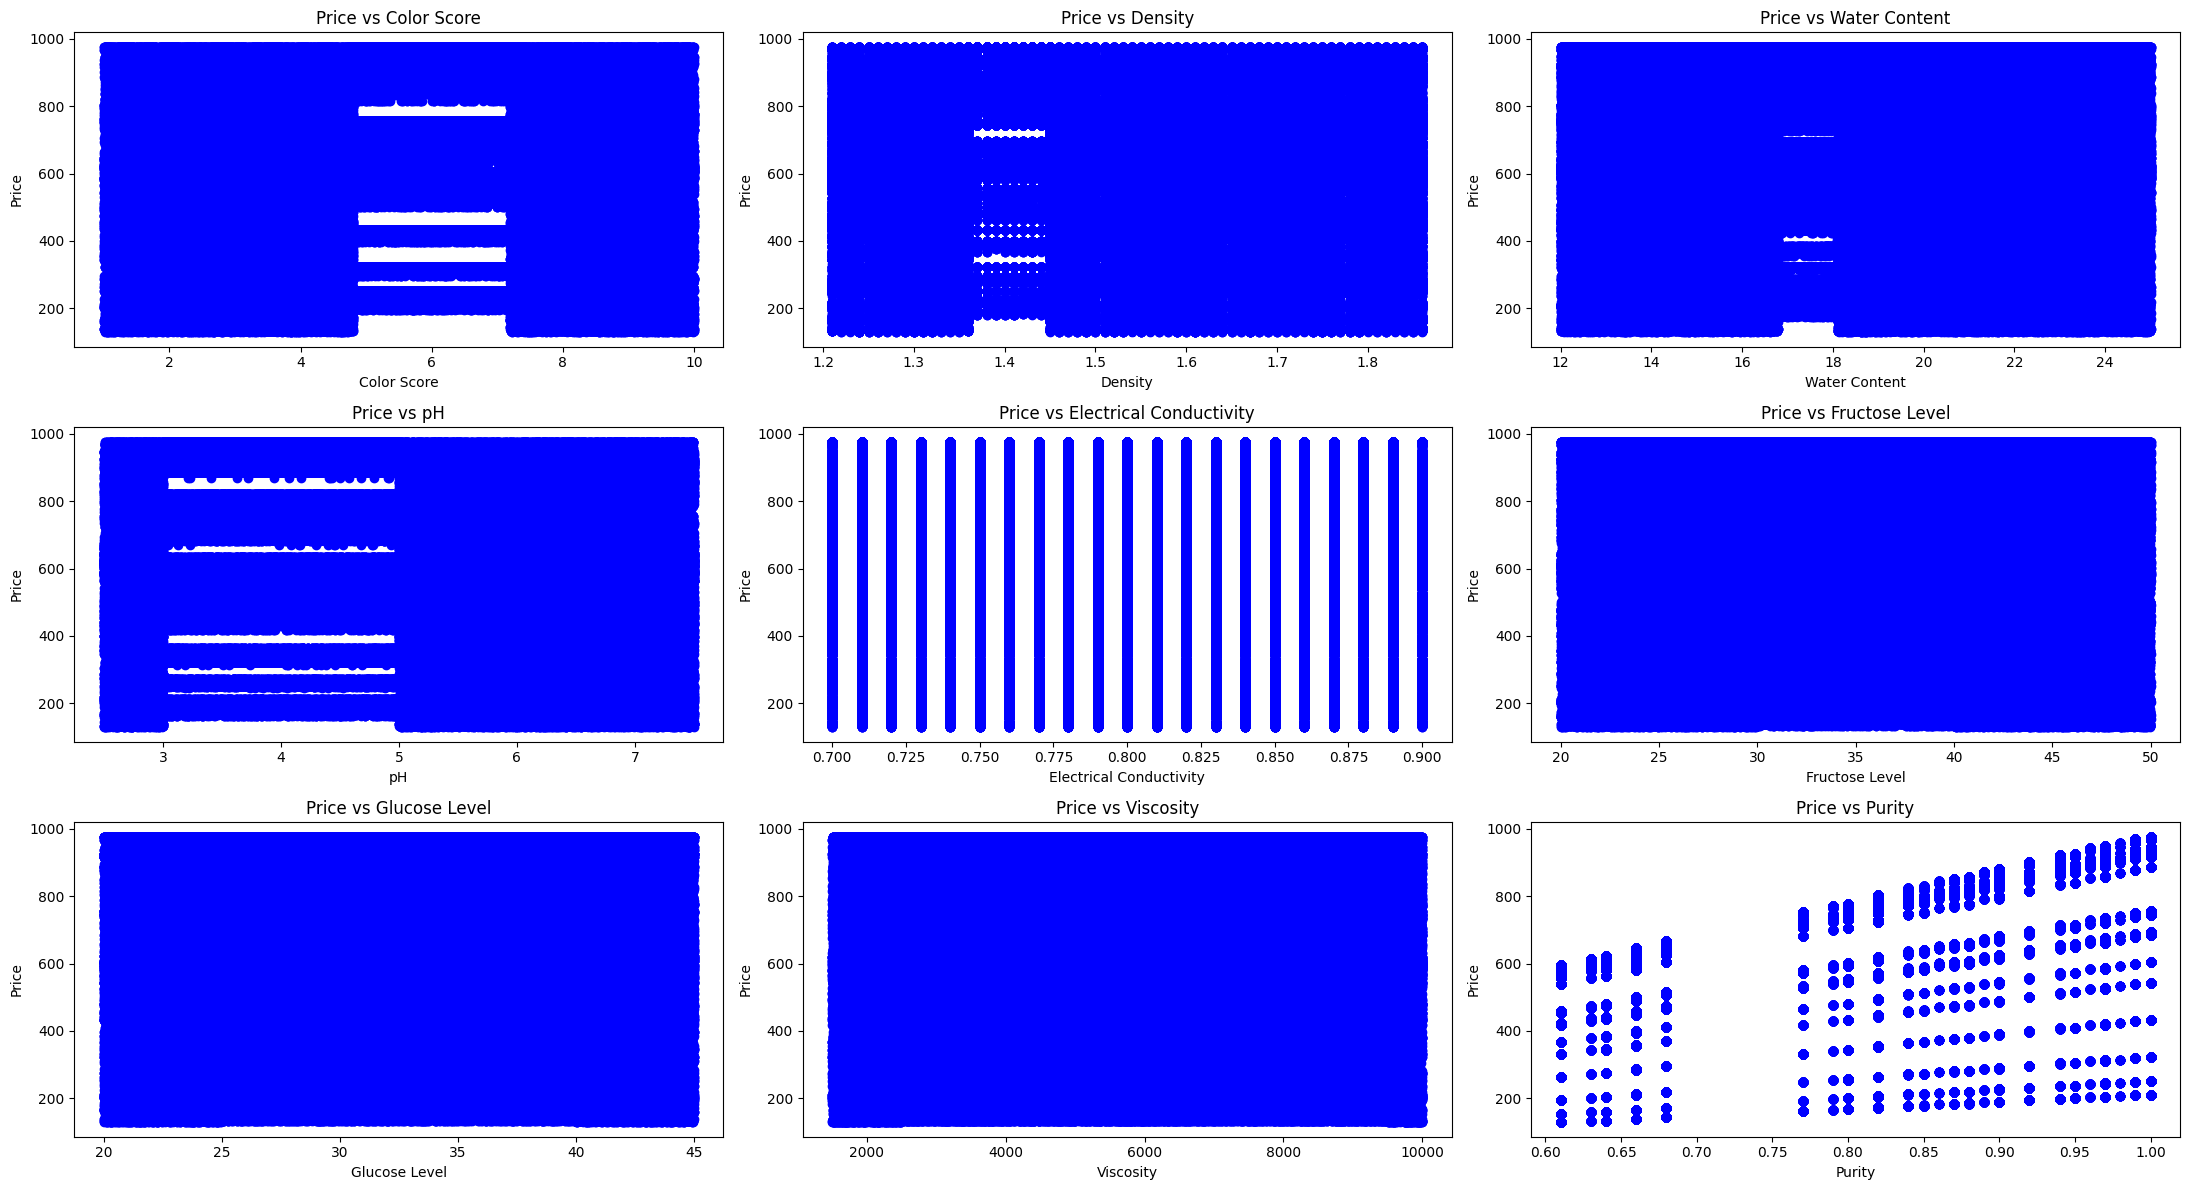

In [16]:
#Scatter plot
plt.figure(figsize=(22, 12))
ind=1
for  variable in (['Color Score', 'Density', 'Water Content', 'pH', 'Electrical Conductivity', 'Fructose Level', 'Glucose Level', 'Viscosity','Purity']):
    plt.subplot(3,3, ind)
    plt.scatter(x=df[variable],y=df["Price"],color="blue")
    plt.title(f"Price vs {variable}")
    ind+=1
    plt.xlabel(variable)
    plt.ylabel("Price")
plt.tight_layout()
plt.show()

_Purity vs Pollen Analysis :_

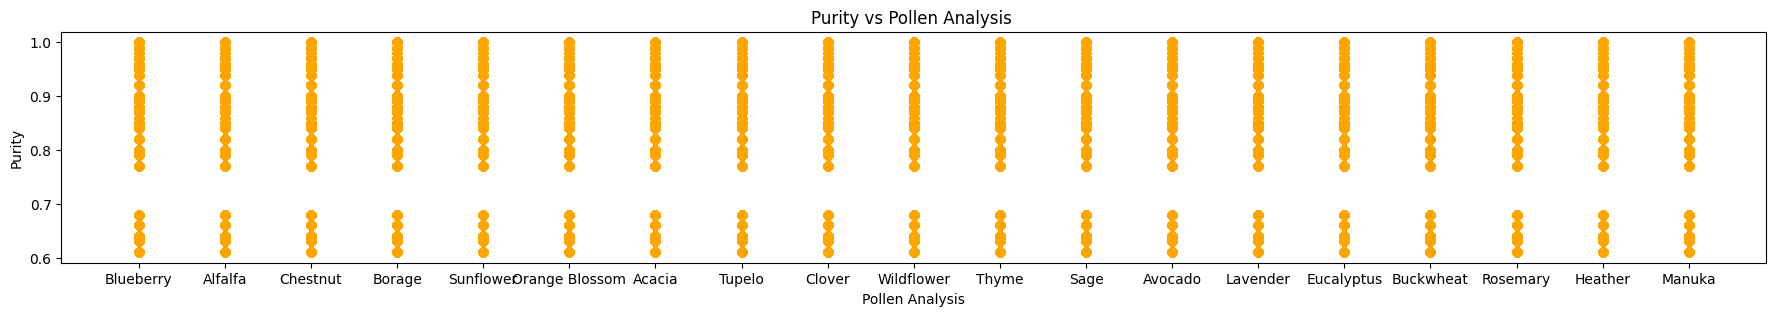

In [17]:
#Scatter plot
plt.figure(figsize=(22, 3))
plt.scatter(x=df["Pollen Analysis"],y=df["Purity"],color="orange")
plt.title("Purity vs Pollen Analysis ")
plt.xlabel('Pollen Analysis')
plt.ylabel('Purity')
plt.show()

_Price vs Pollen Analysis :_

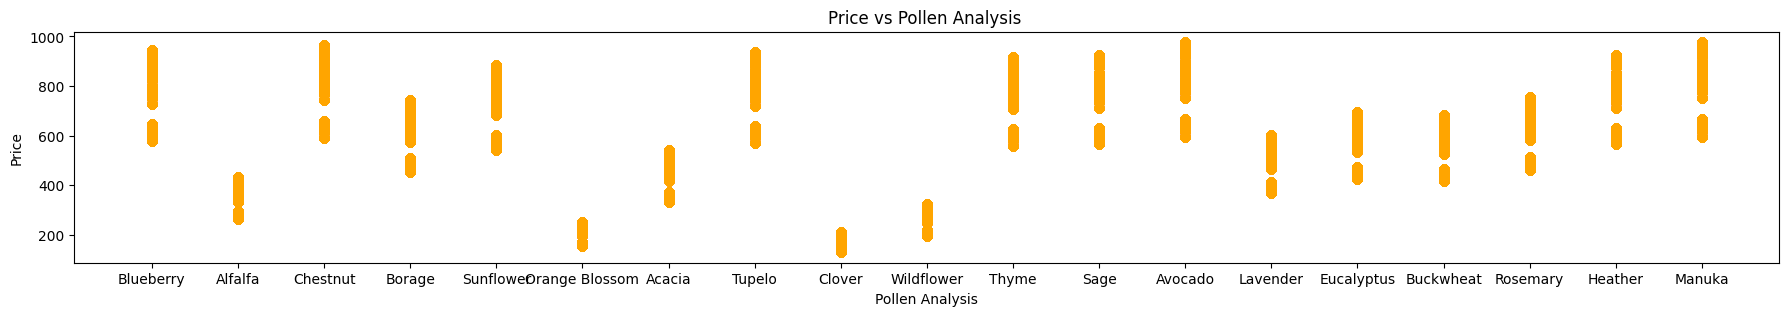

In [18]:
#Scatter plot
plt.figure(figsize=(22, 3))
plt.scatter(x=df["Pollen Analysis"],y=df["Price"],color="orange")
plt.title("Price vs Pollen Analysis ")
plt.xlabel('Pollen Analysis')
plt.ylabel('Price')
plt.show()

***Observation :***
- _Purity across other feature variables are  distributed dispersely._
- _Price across other feature variables are  distributed dispersely._
- **Purity vs Price are also in a disperse distribution.But it follows some kind of linear pattern may be because of different sources of pollens.**

 ***Checking for Correlation :***

In [19]:
df.head()

,Color Score,Density,Water Content,pH,Electrical Conductivity,Fructose Level,Glucose Level,Pollen Analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62


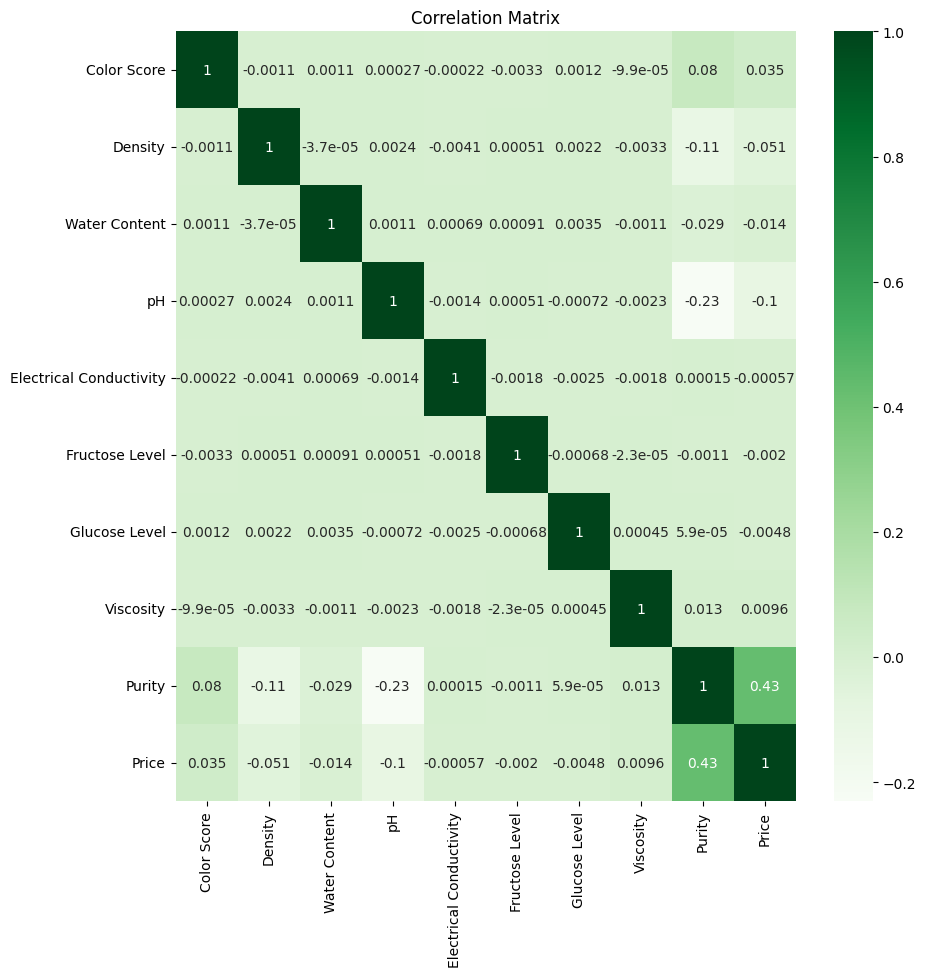

In [20]:
numerical_variables=['Color Score', 'Density', 'Water Content', 'pH', 'Electrical Conductivity', 'Fructose Level', 'Glucose Level', 'Viscosity', 'Purity', 'Price']
plt.figure(figsize=(10, 10))
sns.heatmap(df[numerical_variables].corr(), annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

***Inference :***
- _pH and Purity are negatively correlated to each other (-0.23)._
- _Density and Purity are negatively correlated to each other (-0.11)._
****************************************************************************************
- _pH and Price are negatively correlated to each other (-0.1)._ 
****************************************************************************************
- **Price and Purity have high positive correlation to each other (+0.43).**
****************************************************************************************
- **There is "no noticable  correlation" between the Independent Variables.**

#### ***Encodeing Categorical Column:***

In [21]:
#import necessary libraries
from sklearn.preprocessing import LabelEncoder
#------------------------------------------------------------------------------------
#Label Encoding
label_encoder = LabelEncoder()
df["Pollen Analysis Encoded"] = label_encoder.fit_transform(df["Pollen Analysis"])

____________________________________________________________________________________________________________________
## ***Machine Learning***

####  ***Feature Engineering :***

- _Selecting the optimal feature variables._

The variables _'Electrical Conductivity', 'Fructose Level'_, 'Glucose Level' don't have much relation with the targets.So these variables are neglected.

In [22]:
#Creating a new dataframe with required features
df_new=df[['Color Score', 'Density', 'Water Content', 'pH', 'Viscosity', 'Purity', 'Price','Pollen Analysis Encoded']]

#### ___1.Purity Prediction :___
 - _Initially a model is selected and trained to predict the purity of honey._

_Model Selection :_


_It is a Regression problem so the Regression models such as "Linear Regression","Ridge regression ","Lasso Regression","XGBoost Regressor","Gradient Boost Regressor are used to train the model and checked for error fuction"._


********************************************************************************************************************
**Feature Variables :**
- 'Color Score', 'Density', 'Water Content', 'pH', 'Viscosity','Pollen Analysis Encoded'


**Target Variable :**

- 'Purity'

 _With the available feature variables, the target is to be predicted._
********************************************************************************************************************

In [23]:
#Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [24]:
#Feature variables
X1=df_new[['Color Score', 'Density', 'Water Content', 'pH', 'Viscosity','Pollen Analysis Encoded']]
#Target variable
y1=df_new['Purity']
print("Shape of feature variable :",X1.shape)
print("Shape of target variable :",y1.shape)

Shape of feature variable : (247903, 6)
Shape of target variable : (247903,)


In [25]:
#Train Test Split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [26]:
#Scaling the data using standard scalar
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test= scaler.transform(X1_test)

In [27]:
# Linear Regression
lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)
#------------------------------------------------------------
lr1_pred_train = lr1.predict(X1_train)
lr1_mse_train = mean_squared_error(y1_train, lr1_pred_train)
lr1_r2_train = r2_score(y1_train, lr1_pred_train)
lr1_mae_train = mean_absolute_error(y1_train, lr1_pred_train)
#-------------------------------------------------------------
lr1_pred = lr1.predict(X1_test)
lr1_mse = mean_squared_error(y1_test, lr1_pred)
lr1_r2 = r2_score(y1_test, lr1_pred)
lr1_mae = mean_absolute_error(y1_test, lr1_pred)
#-------------------------------------------------------------

In [28]:
# Ridge Regression
ridge1 = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization
ridge1.fit(X1_train, y1_train)
#---------------------------------------------------------------
# Predictions on training set
ridge1_pred_train = ridge1.predict(X1_train)
ridge1_mse_train = mean_squared_error(y1_train, ridge1_pred_train)
ridge1_r2_train = r2_score(y1_train, ridge1_pred_train)
ridge1_mae_train = mean_absolute_error(y1_train, ridge1_pred_train)
#---------------------------------------------------------------------
# Predictions on test set
ridge1_pred = ridge1.predict(X1_test)
ridge1_mse = mean_squared_error(y1_test, ridge1_pred)
ridge1_r2 = r2_score(y1_test, ridge1_pred)
ridge1_mae = mean_absolute_error(y1_test, ridge1_pred)
#---------------------------------------------------------------------

In [29]:
# Lasso Regression
lasso1 = Lasso(alpha=1.0)  
lasso1.fit(X1_train, y1_train)
#---------------------------------------------------------------------
# Predictions on training set
lasso1_pred_train = lasso1.predict(X1_train)
lasso1_mse_train = mean_squared_error(y1_train, lasso1_pred_train)
lasso1_r2_train = r2_score(y1_train, lasso1_pred_train)
lasso1_mae_train = mean_absolute_error(y1_train, lasso1_pred_train)
#---------------------------------------------------------------------
# Predictions on test set
lasso1_pred = lasso1.predict(X1_test)
lasso1_mse = mean_squared_error(y1_test, lasso1_pred)
lasso1_r2 = r2_score(y1_test, lasso1_pred)
lasso1_mae = mean_absolute_error(y1_test, lasso1_pred)
#---------------------------------------------------------------------

In [30]:
# XGBoost Regressor
xgb1 = XGBRegressor()
xgb1.fit(X1_train, y1_train)
#--------------------------------------------------------------
# Compute predictions on the training set
xgb1_pred_train = xgb1.predict(X1_train)
xgb1_mse_train = mean_squared_error(y1_train, xgb1_pred_train)
xgb1_r2_train = r2_score(y1_train, xgb1_pred_train)
xgb1_mae_train = mean_absolute_error(y1_train, xgb1_pred_train)
#---------------------------------------------------------------
xgb1_pred = xgb1.predict(X1_test)
xgb1_mse = mean_squared_error(y1_test, xgb1_pred)
xgb1_r2 = r2_score(y1_test, xgb1_pred)
xgb1_mae = mean_absolute_error(y1_test, xgb1_pred)
#--------------------------------------------------------------

In [31]:
# Gradient Boost Regressor
gb1 = GradientBoostingRegressor()
gb1.fit(X1_train, y1_train)
#------------------------------------------------------------
gb1_pred_train = gb1.predict(X1_train)
gb1_mse_train = mean_squared_error(y1_train, gb1_pred_train)
gb1_r2_train = r2_score(y1_train, gb1_pred_train)
gb1_mae_train = mean_absolute_error(y1_train, gb1_pred_train)
#------------------------------------------------------------
gb1_pred = gb1.predict(X1_test)
gb1_mse = mean_squared_error(y1_test, gb1_pred)
gb1_r2 = r2_score(y1_test, gb1_pred)
gb1_mae = mean_absolute_error(y1_test, gb1_pred)
#-------------------------------------------------------------

In [32]:
# Include results of Ridge and Lasso regression in the dataframe
df_results_1 = pd.DataFrame({
                            'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'XGBoost Regressor', 'Gradient Boost Regressor'],
                            'train MAE': [lr1_mae_train, ridge1_mae_train, lasso1_mae_train, xgb1_mae_train, gb1_mae_train],
                            'test MAE': [lr1_mae, ridge1_mae, lasso1_mae, xgb1_mae, gb1_mae],
                            'train MSE': [lr1_mse_train, ridge1_mse_train, lasso1_mse_train, xgb1_mse_train, gb1_mse_train],
                            'test MSE': [lr1_mse, ridge1_mse, lasso1_mse, xgb1_mse, gb1_mse],
                            'train R2 Score': [lr1_r2_train, ridge1_r2_train, lasso1_r2_train, xgb1_r2_train, gb1_r2_train],
                            'test R2 Score': [lr1_r2, ridge1_r2, lasso1_r2, xgb1_r2, gb1_r2],
                            })       
df_results_1     

,Model,train MAE,test MAE,train MSE,test MSE,train R2 Score,test R2 Score
0,Linear Regression,0.119006,0.118394,0.018052,0.017946,0.072031,0.073486
1,Ridge Regression,0.119006,0.118394,0.018052,0.017946,0.072031,0.073486
2,Lasso Regression,0.121783,0.121243,0.019453,0.019371,0.000000,-0.000112
3,XGBoost Regressor,0.011929,0.012565,0.000479,0.000565,0.975389,0.970849
4,Gradient Boost Regressor,0.021453,0.021255,0.000936,0.000923,0.951870,0.952334


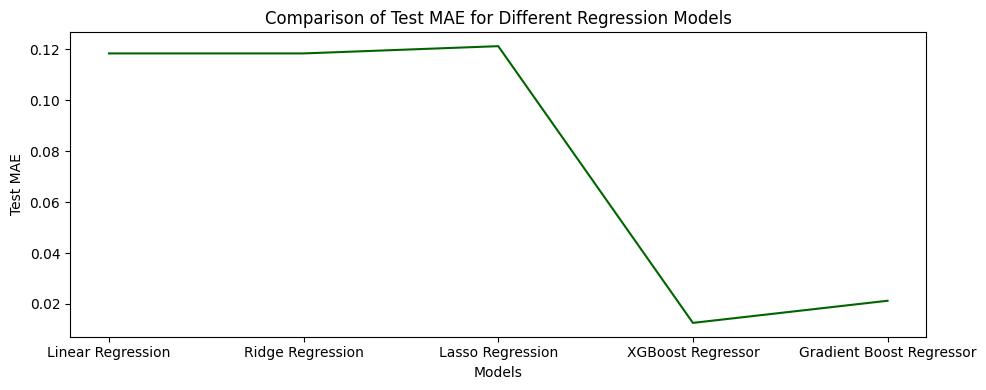

In [89]:
#MAE Vs Models
plt.figure(figsize=(10, 4))
plt.plot(df_results_1["Model"], df_results_1["test MAE"], color='darkgreen')
plt.xlabel('Models')
plt.ylabel('Test MAE')
plt.title('Comparison of Test MAE for Different Regression Models')
plt.tight_layout()
plt.show()

___Observation :___

___Among five different regression models,the boosting models performs well in both training and testing.Especially "XGBoost Regressor" model is better than "Gradient Boost Regressor" which have testing MAE equal to 0.011929 and training MAE equal to 0.012565.So "XGBoost Regressor" model is considered as optimal model.___

#### ***XGBoost Regressor Hyperparameter Tuning :***
- Using Grid Search CV for hyperparameter tuning

In [33]:
#Import necessary Libraries:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 4, 5],
                'learning_rate': [0.01, 0.05, 0.1]         
            }
grid_search1 = GridSearchCV(estimator=xgb1, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search1.fit(X1_train, y1_train)        
xbg1_pred = grid_search1.best_estimator_.predict(X1_test)        

In [85]:
mae_1 = mean_absolute_error(y1_test, xgb1_pred)
mse_1 = mean_squared_error(y1_test, xgb1_pred)
r2_1 = r2_score(y1_test, xgb1_pred)
#------------------------------------------------------------------------ 
print("Best parameters found: ", grid_search1.best_params_)
print("MAE:", mae_1)
print("MSE:", mse_1)
print("R2 Score:", r2_1)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
MAE: 0.012564561064954374
MSE: 0.0005646309430965888
R2 Score: 0.9708488970237298


In [86]:
df_results_2 = pd.DataFrame({'Actual Purity': y1_test, 'Predicted Purity': xbg1_pred})
df_results_2["Predicted Purity"]=df_results_2["Predicted Purity"].apply(lambda x:round(x,2))
df_results_2.sample(n=7)

,Actual Purity,Predicted Purity
102541,0.95,0.97
240484,0.87,0.87
187288,0.82,0.80
32184,0.64,0.66
49321,1.00,1.01
185141,1.00,0.99
27964,0.82,0.82


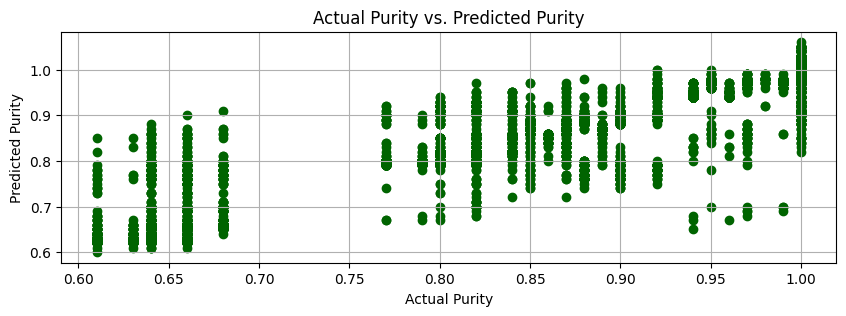

In [84]:
#Scatter Plot
plt.figure(figsize=(10, 3))
plt.scatter(df_results_2['Actual Purity'], df_results_2['Predicted Purity'], color='darkgreen')
plt.title('Actual Purity vs. Predicted Purity')
plt.xlabel('Actual Purity')
plt.ylabel('Predicted Purity')
plt.grid(True)
plt.show()

In [38]:
print("Minimum value in prediction :",df_results_2['Predicted'].min())
print("Maximum value in prediction :",df_results_2['Predicted'].max())

Minimum value in prediction : 0.6
Maximum value in prediction : 1.06


___Observation :___

_By seeing the results of actual value vs predicted value,the actual  range of purity lies  between **'0.01 and 1.00'**, but in some cases,the model predicts more than the maximum limit like **1.06**._


#### ___2.Price Prediction :___
 - _Optimal model is selected and trained to predict the price of honey._

_For prediction of price of the honey the "Viscosity" feature is also removed along with the other unnecessary features because of poor correlation._

In [39]:
#Feature variables
X2=df_new[['Color Score', 'Density', 'Water Content', 'pH','Pollen Analysis Encoded',"Purity"]]
#Target variable
y2=df_new['Price']
#-----------------------------------------------------------------------------------------------
print("Shape of feature variable :",X2.shape)
print("Shape of target variable :",y2.shape)

Shape of feature variable : (247903, 6)
Shape of target variable : (247903,)


In [54]:
#Train Test Split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [55]:
#Scaling the data using standard scalar
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test= scaler.transform(X2_test)

In [56]:
# Linear Regression
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)
#------------------------------------------------------------
lr2_pred_train = lr2.predict(X2_train)
lr2_mse_train = mean_squared_error(y2_train, lr2_pred_train)
lr2_r2_train = r2_score(y2_train, lr2_pred_train)
lr2_mae_train = mean_absolute_error(y2_train, lr2_pred_train)
#-------------------------------------------------------------
lr2_pred = lr2.predict(X2_test)
lr2_mse = mean_squared_error(y2_test, lr2_pred)
lr2_r2 = r2_score(y2_test, lr2_pred)
lr2_mae = mean_absolute_error(y2_test, lr2_pred)
#-------------------------------------------------------------

In [57]:
# Ridge Regression
ridge2 = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization
ridge2.fit(X2_train, y2_train)
#---------------------------------------------------------------
# Predictions on training set
ridge2_pred_train = ridge2.predict(X2_train)
ridge2_mse_train = mean_squared_error(y2_train, ridge2_pred_train)
ridge2_r2_train = r2_score(y2_train, ridge2_pred_train)
ridge2_mae_train = mean_absolute_error(y2_train, ridge2_pred_train)
#---------------------------------------------------------------------
# Predictions on test set
ridge2_pred = ridge2.predict(X2_test)
ridge2_mse = mean_squared_error(y2_test, ridge2_pred)
ridge2_r2 = r2_score(y2_test, ridge2_pred)
ridge2_mae = mean_absolute_error(y2_test, ridge2_pred)
#---------------------------------------------------------------------

In [58]:
# Lasso Regression
lasso2 = Lasso(alpha=1.0)
lasso2.fit(X2_train, y2_train)
#---------------------------------------------------------------------
# Predictions on training set
lasso2_pred_train = lasso2.predict(X2_train)
lasso2_mse_train = mean_squared_error(y2_train, lasso2_pred_train)
lasso2_r2_train = r2_score(y2_train, lasso2_pred_train)
lasso2_mae_train = mean_absolute_error(y2_train, lasso2_pred_train)
#---------------------------------------------------------------------
# Predictions on test set
lasso2_pred = lasso2.predict(X2_test)
lasso2_mse = mean_squared_error(y2_test, lasso2_pred)
lasso2_r2 = r2_score(y2_test, lasso2_pred)
lasso2_mae = mean_absolute_error(y2_test, lasso2_pred)
#---------------------------------------------------------------------

In [59]:
# XGBoost Regressor
xgb2 = XGBRegressor()
xgb2.fit(X2_train, y2_train)
#--------------------------------------------------------------
# Compute predictions on the training set
xgb2_pred_train = xgb2.predict(X2_train)
xgb2_mse_train = mean_squared_error(y2_train, xgb2_pred_train)
xgb2_r2_train = r2_score(y2_train, xgb2_pred_train)
xgb2_mae_train = mean_absolute_error(y2_train, xgb2_pred_train)
#---------------------------------------------------------------
# Compute predictions on the test set
xgb2_pred = xgb2.predict(X2_test)
xgb2_mse = mean_squared_error(y2_test, xgb2_pred)
xgb2_r2 = r2_score(y2_test, xgb2_pred)
xgb2_mae = mean_absolute_error(y2_test, xgb2_pred)
#--------------------------------------------------------------

In [61]:
# Gradient Boost Regressor
gb2 = GradientBoostingRegressor()
gb2.fit(X2_train, y2_train)
#------------------------------------------------------------
gb2_pred_train = gb2.predict(X2_train)
gb2_mse_train = mean_squared_error(y2_train, gb2_pred_train)
gb2_r2_train = r2_score(y2_train, gb2_pred_train)
gb2_mae_train = mean_absolute_error(y2_train, gb2_pred_train)
#------------------------------------------------------------
gb2_pred = gb2.predict(X2_test)
gb2_mse = mean_squared_error(y2_test, gb2_pred)
gb2_r2 = r2_score(y2_test, gb2_pred)
gb2_mae = mean_absolute_error(y2_test, gb2_pred)
#-------------------------------------------------------------

In [62]:
df_results_3 = pd.DataFrame({
                            'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'XGBoost Regressor', 'Gradient Boost Regressor'],
                            'train MAE': [lr2_mae_train, ridge2_mae_train, lasso2_mae_train, xgb2_mae_train, gb2_mae_train],
                            'test MAE': [lr2_mae, ridge2_mae, lasso2_mae, xgb2_mae, gb2_mae],
                            'train MSE': [lr2_mse_train, ridge2_mse_train, lasso2_mse_train, xgb2_mse_train, gb2_mse_train],
                            'test MSE': [lr2_mse, ridge2_mse, lasso2_mse, xgb2_mse, gb2_mse],
                            'train R2 Score': [lr2_r2_train, ridge2_r2_train, lasso2_r2_train, xgb2_r2_train, gb2_r2_train],
                            'test R2 Score': [lr2_r2, ridge2_r2, lasso2_r2, xgb2_r2, gb2_r2],
                          })

df_results_3


,Model,train MAE,test MAE,train MSE,test MSE,train R2 Score,test R2 Score
0,Linear Regression,172.729431,172.188829,44241.556252,43981.171393,0.190044,0.191792
1,Ridge Regression,172.729445,172.188843,44241.556252,43981.171776,0.190044,0.191792
2,Lasso Regression,172.943730,172.407050,44244.619845,43985.749149,0.189988,0.191708
3,XGBoost Regressor,0.832058,0.847027,1.597929,1.643553,0.999971,0.999970
4,Gradient Boost Regressor,17.743692,17.678976,555.902037,550.255409,0.989823,0.989888


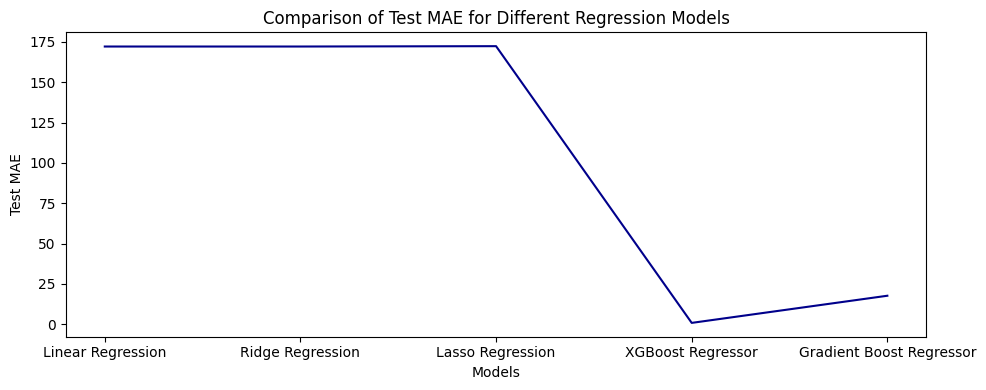

In [88]:
#MAE Vs Models
plt.figure(figsize=(10, 4))
plt.plot(df_results_3["Model"], df_results_3["test MAE"], color='darkblue')
plt.xlabel('Models')
plt.ylabel('Test MAE')
plt.title('Comparison of Test MAE for Different Regression Models')
plt.tight_layout()
plt.show()

___Observation :___

- _Similar to the case of purity prediction, "XGBoost Regressor" model is better among all models."XGBoost Regressor" model is considered as optimal model.It's MAE is comparitively very less __(0.847)__ with good R2-score __(0.99)__._
- _MAE of XGBoost Regressor  is roughly ***20755.42%*** lessar than the MAE of Linear Regression._

#### ***XGBoost Regressor Hyperparameter Tuning :***
- Using Grid Search CV for hyperparameter tuning

In [67]:
param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 4, 5],
            'learning_rate': [0.01, 0.05, 0.1]         
            }
grid_search2 = GridSearchCV(estimator=xgb1, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search2.fit(X2_train, y2_train)        
xbg2_pred = grid_search2.best_estimator_.predict(X2_test)                            

In [74]:
mae = mean_absolute_error(y2_test, xgb2_pred)
mse = mean_squared_error(y2_test, xgb2_pred)
r2 = r2_score(y2_test, xgb2_pred)
#------------------------------------------------------------------------ 
print("Best parameters found: ", grid_search2.best_params_)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
MAE: 0.8470268682491859
MSE: 1.643553111381968
R2 Score: 0.9999697977078518


In [75]:
df_results_5 = pd.DataFrame({'Actual Price': y2_test, 'Predicted Price': xbg2_pred})
df_results_5["Predicted Price"]=df_results_5["Predicted Price"].apply(lambda x:round(x,2))
df_results_5.sample(n=7)

,Actual Price,Predicted Price
244214,321.85,321.84
96860,678.97,677.39
89324,489.20,491.65
41164,612.96,611.80
79210,797.80,800.82
232842,399.58,398.05
135845,204.93,204.81


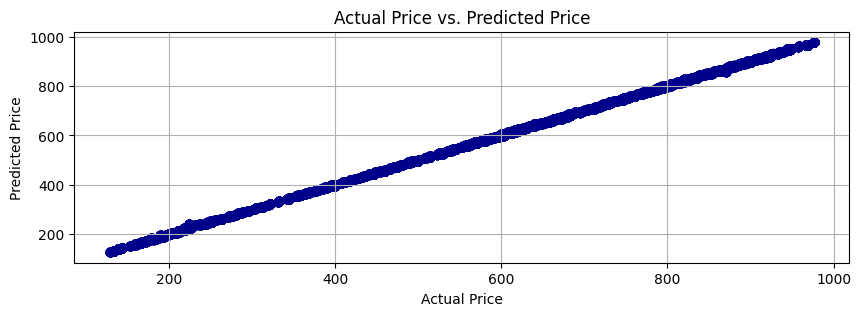

In [81]:
#Scatter Plot
plt.figure(figsize=(10, 3))
plt.scatter(df_results_5['Actual Price'], df_results_5['Predicted Price'], color='darkblue')
plt.title('Actual Price vs. Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

#### ___Suggestions :___
- _In future the model is trained with huge dataset with different Hyperparameters to increase the accuracy level of prediction._